<a href="https://colab.research.google.com/github/AlifyaFebriana/water-quality/blob/main/HSC_A5_Percobaan_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import kaggle dataset to colab

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d elvinagammed/clean-dirty-water-dataset

  0% 0.00/870k [00:00<?, ?B/s]
100% 870k/870k [00:00<00:00, 57.2MB/s]


In [3]:
! unzip /content/clean-dirty-water-dataset.zip

Archive:  /content/clean-dirty-water-dataset.zip
  inflating: water images/test/Clean-samples/29.jpg  
  inflating: water images/test/Clean-samples/30.jpg  
  inflating: water images/test/Clean-samples/31.jpg  
  inflating: water images/test/Clean-samples/32.jpg  
  inflating: water images/test/Clean-samples/33.jpg  
  inflating: water images/test/Clean-samples/36.jpg  
  inflating: water images/test/Clean-samples/37.jpg  
  inflating: water images/test/Clean-samples/38.jpg  
  inflating: water images/test/Clean-samples/39.jpg  
  inflating: water images/test/Dirty-samples/15.jpg  
  inflating: water images/test/Dirty-samples/16.jpg  
  inflating: water images/test/Dirty-samples/17.jpg  
  inflating: water images/test/Dirty-samples/18.jpg  
  inflating: water images/test/Dirty-samples/19.jpg  
  inflating: water images/train/Clean-samples/0.jpg  
  inflating: water images/train/Clean-samples/1.jpg  
  inflating: water images/train/Clean-samples/10.jpg  
  inflating: water images/train/

# Checking class

In [4]:
import os

dir_example = "/content/water images/test"

classes = os.listdir(dir_example)
print(classes)

['Dirty-samples', 'Clean-samples']


# Define training directory and testing directory

In [5]:
train_dir = '/content/water images/train'
test_dir = '/content/water images/test'

# Visualizing clean water and dirty water

Text(0.5, 1.0, 'Clean Water')

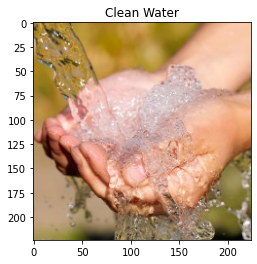

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

cleanImg = Image.open( '/content/water images/test/Clean-samples/29.jpg')
plt.imshow(cleanImg)
plt.title('Clean Water')

Text(0.5, 1.0, 'Dirty Water')

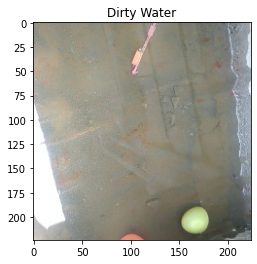

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

dirtyImg = Image.open( '/content/water images/test/Dirty-samples/18.jpg')
plt.imshow(dirtyImg)
plt.title('Dirty Water')

# Check number of images in training and testing data


In [8]:
cleanTrain = len(os.listdir('/content/water images/train/Clean-samples'))
dirtyTrain = len(os.listdir('/content/water images/train/Dirty-samples'))
cleanTest = len(os.listdir('/content/water images/test/Clean-samples'))
dirtyTest = len(os.listdir('/content/water images/test/Dirty-samples'))

print('The number of clean images in training is: ', cleanTrain)
print('The number of dirty images in training is: ', dirtyTrain)
print()
print('The number of clean images in testing is: ', cleanTest)
print('The number of dirty images in testing is: ', dirtyTest)

The number of clean images in training is:  31
The number of dirty images in training is:  16

The number of clean images in testing is:  9
The number of dirty images in testing is:  5


# Data Preprocessing


Preprocessing the Training Set

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 8)


Found 47 images belonging to 2 classes.


Preprocessing the test set

In [50]:
test_datagen = ImageDataGenerator(
    rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 8)

Found 14 images belonging to 2 classes.


In [51]:
#Printing the training set
labels = (train_generator.class_indices)
print(labels,'\n')

{'Clean-samples': 0, 'Dirty-samples': 1} 



# Building the CNN

In [38]:
from tensorflow.keras.applications import MobileNetV2

base_model= MobileNetV2(input_shape = (224, 224, 3), 
                        weights = 'imagenet',
                        include_top = False, 
                        classes = 2)

In [39]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [45]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

model = base_model.output
model = Dropout(0.5)(model)
model = GlobalAveragePooling2D()(model)
predictions = Dense(2, activation='sigmoid')(model)
model = Model(inputs=base_model.input, outputs=predictions)

In [46]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [15]:
#import tensorflow as tf

#model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
#    tf.keras.layers.MaxPooling2D(2, 2),
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(512, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
'''
import numpy as np
import math

# labels_dict : {ind_label: count_label}
# mu : parameter to tune 

def create_class_weight(labels_dict, mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight

# random labels_dict
labels_dict = {0: 31, 1: 16}

create_class_weight(labels_dict)
'''

{0: 1.0, 1: 1.0}

In [43]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size
print(STEPS_PER_EPOCH,VALIDATION_STEPS)

5 1


In [48]:
history = model.fit(train_generator,
                    epochs = 20,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator),
                    verbose = 1)

Epoch 1/20


ValueError: ignored